### import modules



In [36]:
import sys
sys.path.append("/media/d_disk/projects/Clustering/ect/")
sys.path.append("/media/d_disk/projects/Clustering/ectgui2/")
import pandas as pd
import clustering
import numpy as np
from numpy.linalg import svd as np_svd
from matplotlib import pyplot as plt
from plot.plot import plot

### load data

In [37]:
data = pd.read_csv('./data/smartphones.dat')
data

,name,price,diag,cpu,ram,stype,vendor
0,Meizu U10 32GB Silver White,11990.0,5.0,1.50,3072,IPS,Meizu
1,ZTE Blade A510 Grey,7011.0,5.0,1.00,1024,IPS,ZTE
2,Huawei P9 Lite (VNS-L21) Gold,14190.0,5.2,2.00,2048,IPS,Huawei
3,Meizu M5 32GB Black,12990.0,5.2,1.50,3072,IPS,Meizu
4,ZTE Blade L370 Black,4990.0,5.0,1.30,1024,TFT,ZTE
5,BQ Aquaris M5.5 16+3GB White,18072.0,5.5,1.50,3072,IPS,BQ
6,Samsung SM-G930F Galaxy S7 (32GB) Silver,39990.0,5.1,2.30,4096,Super AMOLED,Samsung
7,Alcatel OT-4034D Pixi 4 (4.0) Black,3160.0,4.0,1.30,512,TFT,Alcatel
8,Sony Xperia XA Graphite Black,13989.7,5.0,2.00,2048,IPS,Sony
9,ZTE Blade L5 Plus Black,6790.0,5.0,1.30,1024,IPS,ZTE


In [38]:
def eq(row1, row2):
    cols = [x for x in row1.index if x != "name"]
    for col in cols:
        if row1[col]!=row2[col]:
            return False
    return True

### sort data

In [39]:
sdata = data.sort_values(by=['name']) #.reset_index(drop=True)
sdata

,name,price,diag,cpu,ram,stype,vendor
145,ASUS ZenFone 2 Laser ZE500KL 8GB White (90AZ0...,6990.0,5.0,1.20,2048,IPS,ASUS
102,ASUS ZenFone 2 Laser ZE550KL 16GB Black (90AZ...,10642.5,5.5,1.20,2048,TFT,ASUS
116,ASUS ZenFone 2 Laser ZE550KL 16GB White (90AZ...,11799.0,5.5,1.20,2048,TFT,ASUS
354,ASUS ZenFone 2 Laser ZE550KL 32GB White,13950.0,5.5,1.50,3072,IPS,ASUS
62,ASUS ZenFone 2 Laser ZE601KL Gold (90AZ0113-M...,14799.0,6.0,1.70,3072,IPS,ASUS
125,ASUS ZenFone 3 Deluxe ZS550KL Gold (90AZ01F1-...,31090.0,5.5,2.00,4096,IPS,ASUS
139,ASUS ZenFone 3 Deluxe ZS550KL Silver (90AZ01F...,31090.0,5.5,2.00,4096,IPS,ASUS
183,ASUS ZenFone 3 Deluxe ZS570KL Gold (90AZ0161-...,42890.0,5.7,2.15,6144,Super AMOLED,ASUS
197,ASUS ZenFone 3 Deluxe ZS570KL Silver (90AZ016...,35992.0,5.7,2.15,6144,Super AMOLED,ASUS
305,ASUS ZenFone 3 Max ZC520TL Gold (90AX0085-M00...,11490.0,5.2,1.30,2048,IPS,ASUS


### drop unique

In [40]:
empty = pd.DataFrame([],columns=sdata.columns)
N = len(sdata.index)
b = c = 0
while b < N:
    empty = empty.append(sdata.iloc[b])
    while eq(sdata.iloc[b], sdata.iloc[c]):
        c+=1
        if c>N-1: break
    b=c

udata = empty
assert len(udata)>371
assert not(51 in udata.index and 318 in udata.index)

In [41]:
udata

,name,price,diag,cpu,ram,stype,vendor
145,ASUS ZenFone 2 Laser ZE500KL 8GB White (90AZ0...,6990.0,5.0,1.20,2048,IPS,ASUS
102,ASUS ZenFone 2 Laser ZE550KL 16GB Black (90AZ...,10642.5,5.5,1.20,2048,TFT,ASUS
116,ASUS ZenFone 2 Laser ZE550KL 16GB White (90AZ...,11799.0,5.5,1.20,2048,TFT,ASUS
354,ASUS ZenFone 2 Laser ZE550KL 32GB White,13950.0,5.5,1.50,3072,IPS,ASUS
62,ASUS ZenFone 2 Laser ZE601KL Gold (90AZ0113-M...,14799.0,6.0,1.70,3072,IPS,ASUS
125,ASUS ZenFone 3 Deluxe ZS550KL Gold (90AZ01F1-...,31090.0,5.5,2.00,4096,IPS,ASUS
183,ASUS ZenFone 3 Deluxe ZS570KL Gold (90AZ0161-...,42890.0,5.7,2.15,6144,Super AMOLED,ASUS
197,ASUS ZenFone 3 Deluxe ZS570KL Silver (90AZ016...,35992.0,5.7,2.15,6144,Super AMOLED,ASUS
305,ASUS ZenFone 3 Max ZC520TL Gold (90AX0085-M00...,11490.0,5.2,1.30,2048,IPS,ASUS
169,ASUS ZenFone 3 Max ZC553KL Silver (90AX00D3-M...,16990.0,5.5,1.40,2048,IPS,ASUS


### rename rare screen types

In [42]:
udata['stype'].value_counts()

IPS                256
Super AMOLED        32
TFT                 30
LTPS                15
Retina IPS          15
TN                  10
SuperLCD             9
AMOLED               8
SuperLCD 5           3
HD Super AMOLED      3
IGZO                 2
LCD                  1
OLED                 1
SuperLCD 3           1
Name: stype, dtype: int64

In [43]:
udata.loc[udata.stype=='HD Super AMOLED',"stype"]='Super AMOLED'
udata.loc[udata.stype=='SuperLCD 5',"stype"]='SuperLCD'
udata.loc[udata.stype=='SuperLCD 3',"stype"]='SuperLCD'
udata.loc[udata.stype=='IGZO',"stype"]='Other'
udata.loc[udata.stype=='OLED',"stype"]='Other'
udata.loc[udata.stype=='LCD',"stype"]='Other'

udata['stype'].value_counts()

IPS             256
Super AMOLED     35
TFT              30
LTPS             15
Retina IPS       15
SuperLCD         13
TN               10
AMOLED            8
Other             4
Name: stype, dtype: int64

In [48]:
udata.groupby(["stype"]).mean().sort_values(by=['price'])

,price,diag,cpu
stype,,,
TN,4236.600000,4.290000,1.210000
TFT,7787.913333,4.653333,1.258333
IPS,12894.332812,5.216797,1.484570
Other,16090.000000,4.775000,1.487500
SuperLCD,23413.053846,5.284615,1.850000
AMOLED,23832.625000,5.375000,1.831250
LTPS,24608.780000,5.420000,2.157333
Super AMOLED,29249.688571,5.357143,1.977143
Retina IPS,50451.320000,4.980000,2.180000


### one-hot encode stype

In [9]:
for uv in udata['stype'].unique():
    udata[uv]=udata['stype']==uv
print(udata.shape)

(386, 16)


In [10]:
vendor = udata['vendor']
try:
    del udata['stype']
    del udata['vendor']
    del udata['name']
except:
    pass
mdata = udata.values.astype(float)
cols = udata.columns

In [11]:
np.savetxt('./data/smartphones-norm.dat',mdata,delimiter=',', header=','.join(udata.columns), comments="")
mdata

array([[  6.99000000e+03,   5.00000000e+00,   1.20000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.06425000e+04,   5.50000000e+00,   1.20000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.17990000e+04,   5.50000000e+00,   1.20000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.83900000e+04,   5.00000000e+00,   1.50000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.46900000e+04,   5.50000000e+00,   1.50000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.05900000e+03,   4.50000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [12]:
uvendor = vendor.unique()
for i,uv in enumerate(uvendor):
    vendor.loc[vendor==uv]=i

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
np.set_printoptions(suppress=True, precision=3)

In [29]:
print(["{}[{}]".format(x,i) for i,x in enumerate(cols)])

['price[0]', 'diag[1]', 'cpu[2]', 'ram[3]', 'IPS[4]', 'TFT[5]', 'Super AMOLED[6]', 'AMOLED[7]', 'Retina IPS[8]', 'TN[9]', 'SuperLCD[10]', 'LTPS[11]', 'Other[12]']


### features correlation

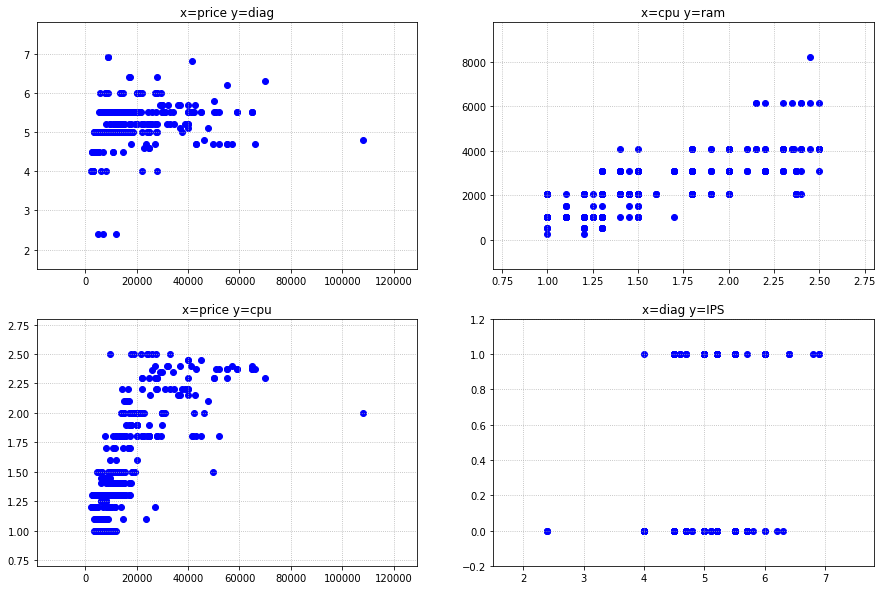

In [34]:
# fig, ax = plt.subplots()

fig, axarr = plt.subplots(2, 2,figsize=(15,10))

i,j=0,1
plot(axarr[0,0], np.vstack((mdata[:,i],mdata[:,j])).T, title="x={} y={}".format(cols[i],cols[j]))
i,j=2,3
plot(axarr[0,1], np.vstack((mdata[:,i],mdata[:,j])).T, title="x={} y={}".format(cols[i],cols[j]))
i,j=0,2
plot(axarr[1,0], np.vstack((mdata[:,i],mdata[:,j])).T, title="x={} y={}".format(cols[i],cols[j]))
i,j=1,4
plot(axarr[1,1], np.vstack((mdata[:,i],mdata[:,j])).T, title="x={} y={}".format(cols[i],cols[j]))
plt.show()

### start clustering

In [15]:
def plot_svd(data, labels=None):
    u, s, v = np_svd(mdata_norm)
    s[1] = -s[1]
    fig, ax = plt.subplots()
    plot(ax, u[:, 0:2] * s[0:2], title="SVD", labels=labels)
    plt.show()

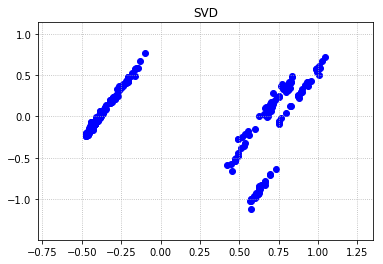

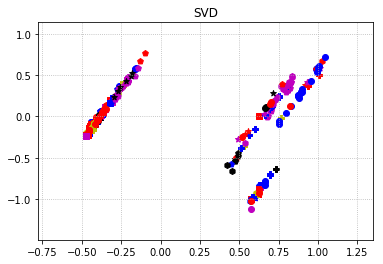

In [16]:
#normalize data
mdata_norm = mdata - np.mean(mdata, axis=0)
mdata_norm = mdata_norm / (np.max(mdata_norm, axis=0) - np.min(mdata_norm, axis=0))
# plot svd
plot_svd(mdata_norm)
plot_svd(mdata_norm, labels=vendor)

### let's try dePDDP

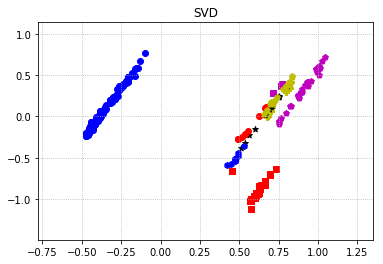

In [17]:
from clustering.divisive.depddp import DEPDDP
depddp_alg = DEPDDP(mdata_norm)
labels = depddp_alg()
cluster_structure = depddp_alg.cluster_structure
plot_svd(mdata_norm, labels)

In [18]:
for cluster in cluster_structure.clusters:
    print(cluster.centroid)

[-0.032  0.012 -0.062 -0.019  0.337 -0.078 -0.091 -0.021 -0.039 -0.026
 -0.034 -0.039 -0.01 ]
[-0.079 -0.129 -0.218 -0.143 -0.663  0.89  -0.091 -0.021 -0.039  0.006
 -0.034 -0.039 -0.01 ]
[ 0.123  0.043  0.267  0.144 -0.663 -0.078  0.909 -0.021 -0.039 -0.026
 -0.034 -0.039 -0.01 ]
[ 0.323 -0.04   0.402  0.015 -0.663 -0.078 -0.091 -0.021  0.961 -0.026
 -0.034 -0.039 -0.01 ]
[ 0.067  0.027  0.182  0.106 -0.663 -0.078 -0.091 -0.021 -0.039 -0.026
  0.966 -0.039 -0.01 ]
[-0.119 -0.194 -0.245 -0.199 -0.663 -0.078 -0.091 -0.021 -0.039  0.874
 -0.034 -0.039  0.09 ]
[ 0.024  0.047 -0.018  0.053 -0.663 -0.078 -0.091  0.729 -0.039 -0.026
 -0.034 -0.039  0.24 ]
[ 0.152  0.09   0.549  0.317 -0.663 -0.078 -0.091  0.646 -0.039 -0.026
 -0.034 -0.039  0.323]
[ 0.079  0.057  0.387  0.222 -0.663 -0.078 -0.091 -0.021 -0.039 -0.026
 -0.034  0.961 -0.01 ]


In [19]:
mdata_norm.mean(axis=0)

array([-0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.])